# BL40A2030 Wireless Communication Networks

## Week 6: Wireless networks - Outage probability and statistical metrics

## Author: Pedro Nardelli

### References 

#### Markdown syntax for writing in the notebook

[Markdown syntax](https://help.github.com/articles/basic-writing-and-formatting-syntax/)

#### Library for numerical calculation in Python

[Numpy](http://www.numpy.org/)

#### Statistical functions

[scipy.stats](Statistical functions)

#### Spatial manipulation in Scipy

[scipy.spatial](https://docs.scipy.org/doc/scipy-0.14.0/reference/spatial.html)

#### Plot in Python

[Matplotlib](https://matplotlib.org/tutorials/introductory/pyplot.html)

#### Mathematical functions (like Gamma)

[Math](https://docs.python.org/3/library/math.html)

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
import math
#style.use('bmh')
from scipy.spatial import distance
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')

# Outage probability

## 1) Testing the closest neighbor lower-bound: $ P_o \geq 1 - e^{-\lambda \pi d^2 \beta^{2/\alpha}}$ 

### Validation: Simulate a wireless network with a receiver in the center, $d=2$, $\alpha = 3$, and $\beta = 2$ and compute the outage probability $\mathrm{Pr}[ \mathrm{SIR} < \beta]$ as a function of $\lambda$

In [3]:
### Probability of successful transmission = 1 -outage probability
### Simulation
def suc_prob(d,beta,alpha,L,mean_poisson,trials):
    interference = np.zeros(trials)
    success = 0
    for j in range(trials):   
        #Number of nodes
        n = np.random.poisson(mean_poisson)
        #
        #Uniform distribution in x
        position_x_realization = np.random.uniform(-L/2,L/2,n)

        #Uniform distribution in y
        position_y_realization = np.random.uniform(-L/2,L/2,n)
        ##
        #Manipulating arrays to compute distances
        position_x_realization_t = np.transpose(position_x_realization) 
        position_y_realization_t = np.transpose(position_y_realization) 
        position_final = []
        position_final = [[position_x_realization_t[i], position_y_realization_t[i]] for i in range(n)]
        #position_final
        ###############
        #The distance to the rx1 (0,0)
        ###
        distance_rx = []
        distance_rx = [distance.euclidean(position_final[i],[0,0]) for i in range(n)]
        interference_i = []
        interference_i = [distance_rx[i]**(-alpha) for i in range(n)]
        if np.sum(interference_i) * beta < d**(-alpha): 
            success = success + 1
    return success/trials

In [4]:
### Lower bound of the outage probability
### Analytical - closest neighbor
def out_lb(d,beta,alpha,L,mean_poisson):
    return 1 - np.exp(-mean_poisson/L**2 * d**2 * np.pi * beta**(2/alpha))

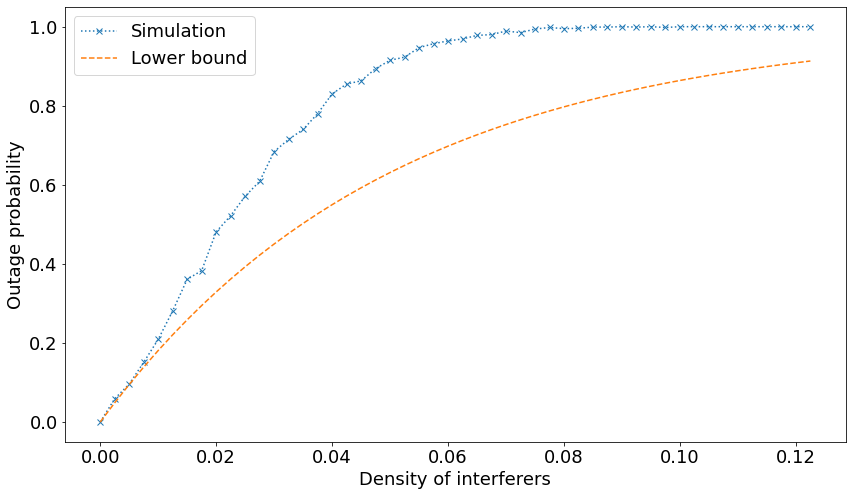

In [5]:
# 
d=2
beta=2
alpha=3
L=20
#Simulation
n_trials = 1000
### Density of interferers as mean_poisson / network area
density = []
density = [i/L**2 for i in range(50)]
###
out_simul = []
out_simul = [1 - suc_prob(d,beta,alpha,L,mean_poisson = i,trials =n_trials) for i in range(50)]
#Lower-bound
out_lb_ana = []
out_lb_ana = [out_lb(d=2,beta=2,alpha=3,L=20,mean_poisson= i) for i in range(50)]

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
plt.plot(density, out_simul, 'x:' , label='Simulation')
plt.plot(density,out_lb_ana , '--' , label='Lower bound')
plt.xlabel("Density of interferers")
plt.ylabel("Outage probability")
plt.legend()
plt.show()

### Try with other values of $\beta$ and $d$

## 2) Testing closed-form with Rayleigh fading (i.i.d. exponential channel gains): $ P_o = 1 - e^{- \kappa \lambda \pi d^2 \beta^{2/\alpha}}$

### Validation: Simulate a wireless network with a receiver in the center, $d=2$, $\alpha = 3$, and $\beta = 2$ and compute the outage probability $\mathrm{Pr}[ \mathrm{SIR} < \beta]$ as a function of $\lambda$

In [6]:
### Outage probability with Rayleigh
### Analytical - closed-form
def out_ray(d,beta,alpha,L,mean_poisson):
    kappa = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)
    return 1 - np.exp(-kappa * mean_poisson/L**2 * d**2 * np.pi * beta**(2/alpha))

In [7]:
### Probability of successful transmission = 1 -outage probability
### Simulation
def suc_prob_ray(d,beta,alpha,L,mean_poisson,trials):
    interference = np.zeros(trials)
    success = 0
    for j in range(trials):   
        #Number of nodes
        n = np.random.poisson(mean_poisson)
        #
        #Uniform distribution in x
        position_x_realization = np.random.uniform(-L/2,L/2,n)

        #Uniform distribution in y
        position_y_realization = np.random.uniform(-L/2,L/2,n)
        ##
        #Manipulating arrays to compute distances
        position_x_realization_t = np.transpose(position_x_realization) 
        position_y_realization_t = np.transpose(position_y_realization) 
        position_final = []
        position_final = [[position_x_realization_t[i], position_y_realization_t[i]] for i in range(n)]
        #position_final
        ###############
        #The distance to the rx1 (0,0)
        ###
        distance_rx = []
        distance_rx = [distance.euclidean(position_final[i],[0,0]) for i in range(n)]
        interference_i = []
        interference_i = [np.random.exponential(1)*distance_rx[i]**(-alpha) for i in range(n)]
        if np.sum(interference_i) * beta < np.random.exponential(1) * d**(-alpha): 
            success = success + 1
    return success/trials

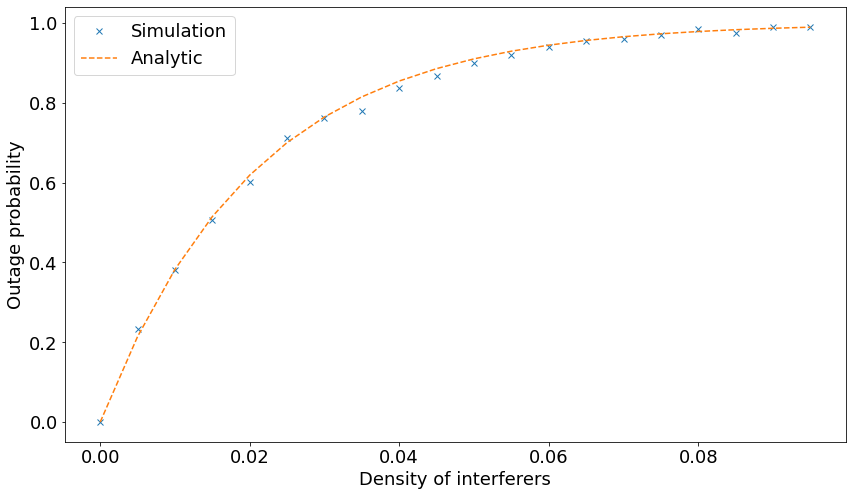

In [8]:
# 
d=2
beta=2
alpha=3
L=100
#Simulation
n_trials = 1000
### Density of interferers as mean_poisson / network area
density = []
density = [50*i/L**2 for i in range(20)]
###
out_simul = []
out_simul = [1 - suc_prob_ray(d,beta,alpha,L,mean_poisson = 50*i,trials =n_trials) for i in range(20)]
#Lower-bound
out_lb_ana = []
out_lb_ana = [out_ray(d,beta,alpha,L,mean_poisson= 50*i) for i in range(20)]

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
plt.plot(density, out_simul, 'x' , label='Simulation')
plt.plot(density,out_lb_ana , '--' , label='Analytic')
plt.xlabel("Density of interferers")
plt.ylabel("Outage probability")
plt.legend()
plt.show()

### Test yourself (but the simulation can be slow...)

# Performance metrics

### 1) Expected forward progress: $d \times (1-P_o)$

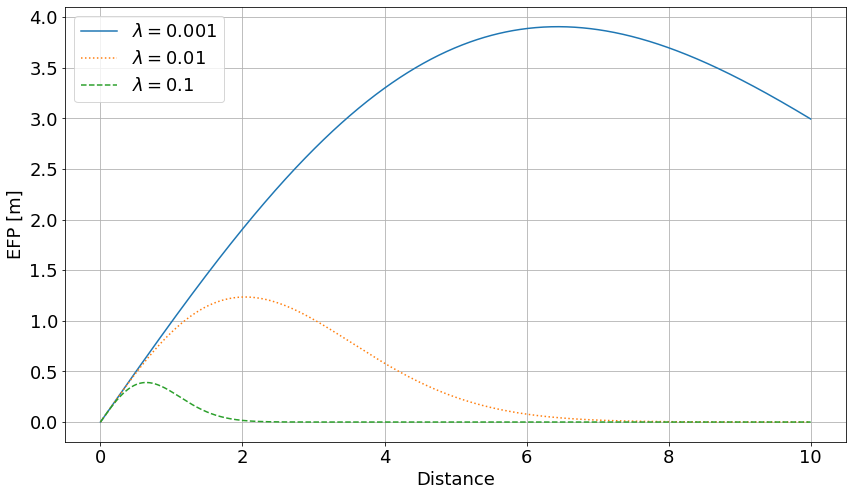

In [9]:
#SIR threshold
beta=2
#Path-loss
alpha=3
#Constant from Rayleigh fading 
kappa = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)
#Distance array
d = np.linspace(0,10,1000)
#####
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
#Network density
lamb = 0.001
plt.plot(d, d * np.exp(-kappa * lamb * d**2 * np.pi * beta**(2/alpha)) , '-' , label=r'$\lambda=0.001$')
#Network density
lamb = 0.01
plt.plot(d, d * np.exp(-kappa * lamb * d**2 * np.pi * beta**(2/alpha)) , ':' , label=r'$\lambda=0.01$')
#Network density
lamb = 0.1
plt.plot(d, d * np.exp(-kappa * lamb * d**2 * np.pi * beta**(2/alpha)) ,'--' , label=r'$\lambda=0.1$')
#######
plt.xlabel("Distance")
plt.ylabel("EFP [m]")
plt.grid()
plt.legend()
plt.show()

### 2) Information efficiency: $d \times (1-P_o) \times \log_2(1+\beta)$

- We assume Shannon to related the spectral efficiency in [bits/s/Hz] with the SIR threshold.

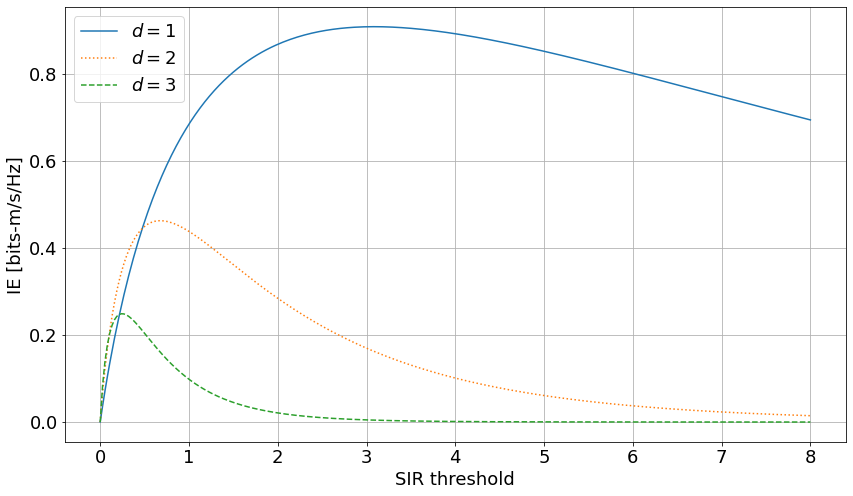

In [10]:
#Path-loss
alpha=3
#Constant from Rayleigh fading 
kappa = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)
#Network density
lamb = 0.05
#SIR threshold array
beta = np.linspace(0,8,300)
#####
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
#distance
d=1
plt.plot(beta, d * np.exp(-kappa * lamb * d**2 * np.pi * beta**(2/alpha)) * np.log2(1+beta) , '-' , label=r'$d=1$')
#distance
d=2
plt.plot(beta, d * np.exp(-kappa * lamb * d**2 * np.pi * beta**(2/alpha)) * np.log2(1+beta), ':' , label=r'$d=2$')
#distance
d=3
plt.plot(beta, d * np.exp(-kappa * lamb * d**2 * np.pi * beta**(2/alpha))* np.log2(1+beta) ,'--' , label=r'$d=3$')
#######
plt.xlabel("SIR threshold")
plt.ylabel("IE [bits-m/s/Hz]")
plt.grid()
plt.legend()
plt.show()

### 3) Spatial throughput/Area spectral efficiency (for bipolar networks): $\lambda \times (1-P_o) \times \log_2(1+\beta)$

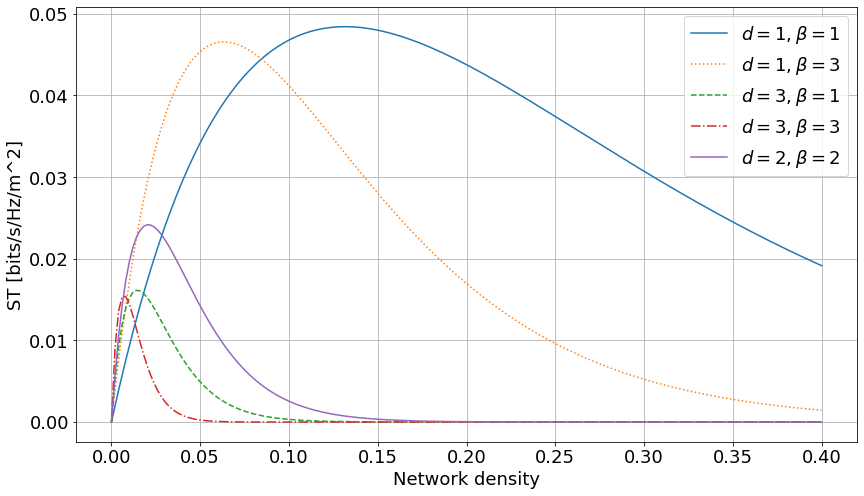

In [11]:
#Path-loss
alpha=3
#Constant from Rayleigh fading 
kappa = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)
#Network density
lamb = np.linspace(0,0.4,200)
#####
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
###########
#distance
d=1
#SIR th
beta=1
plt.plot(lamb, lamb * d * np.exp(-kappa * lamb * d**2 * np.pi * beta**(2/alpha)) * np.log2(1+beta) , '-' , label=r'$d=1,\beta=1$')
#distance
d=1
#SIR th
beta=3
plt.plot(lamb, lamb * d * np.exp(-kappa * lamb * d**2 * np.pi * beta**(2/alpha)) * np.log2(1+beta), ':' , label=r'$d=1,\beta=3$')
###########
#distance
d=3
#SIR th
beta=1
plt.plot(lamb, lamb * d * np.exp(-kappa * lamb * d**2 * np.pi * beta**(2/alpha))* np.log2(1+beta) ,'--' , label=r'$d=3,\beta=1$')
###########
#distance
d=3
#SIR th
beta=3
plt.plot(lamb, lamb *  d * np.exp(-kappa * lamb * d**2 * np.pi * beta**(2/alpha))* np.log2(1+beta) ,'-.' ,label=r'$d=3,\beta=3$')
###########
###########
#distance
d=2
#SIR th
beta=2
plt.plot(lamb, lamb *  d * np.exp(-kappa * lamb * d**2 * np.pi * beta**(2/alpha))* np.log2(1+beta) ,'-' ,label=r'$d=2,\beta=2$')
###########
plt.xlabel("Network density")
plt.ylabel("ST [bits/s/Hz/m^2]")
plt.grid()
plt.legend()
plt.show()

### Try out with different values for the 3 metrics in consideration.